### Problem Statement

In [1]:
import tests.custom_tests as tests

N, values, weights, W_capacity = tests.random_test(7, 3)

suma = sum(w for w in weights)
print('sum: ', suma)
print(W_capacity)

print('Ratio: ', suma/W_capacity)

sum:  386
41
Ratio:  9.414634146341463


### Exact solution

In [2]:
from dp_solver import DP_solver

dp_solver = DP_solver(W_capacity, weights, values)
items_in_solution = dp_solver.run()
dp_solver.show_solution()

-------- Solution has items:  [1] --------
 - Evaluating candidate  [1]
Profit: 30
Weight: 38 (satisfies constraint W=41)
Energy: -42.735
-------------------------------------------------


### Simulated annealing

In [3]:
from neal_solver import Neal_annealing_solver

H_solver = Neal_annealing_solver(W_capacity, weights, values)
solution_items = H_solver.run()
H_solver.show_solution()

# H_solver.energy_of_items(items_in_solution)


-------- Solution has items:  [4] --------
 - Evaluating candidate  [4]
Profit: 92
Weight: 46 (does NOT satisfy constraint W=41)
Energy: -63.355000000000004
-------------------------------------------------


[Qibo 0.2.7|INFO|2024-05-11 17:50:14]: Using numpy backend on /CPU:0
[Qibo 0.2.7|WARNING|2024-05-11 17:50:14]: Calculating the dense form of a symbolic Hamiltonian. This operation is memory inefficient.
[Qibo 0.2.7|WARNING|2024-05-11 17:50:14]: Calculating the dense form of a symbolic Hamiltonian. This operation is memory inefficient.


Exact solution has items:  [4]
fins aqui
Target energy -5786.383750000002
+ offset (5723.028749999999) = -63.3550000000032
final annealing energy:  -2387.829997930532
-------- Solution has items:  [1, 5] --------
 - Evaluating candidate  [1, 5]
Profit: 77
Weight: 46 (does NOT satisfy constraint W=41)
Energy: -48.355
-------------------------------------------------


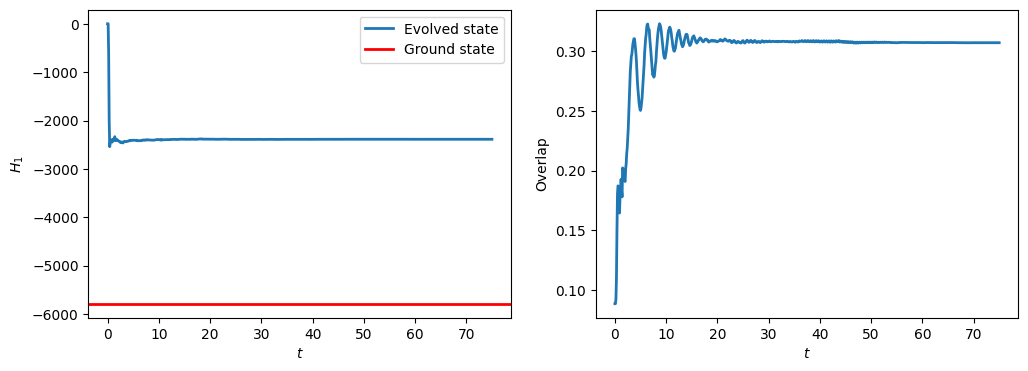

In [4]:
from qibo_solver import Qibo_annealing_solver

Qibo_solver = Qibo_annealing_solver(W_capacity, weights, values)
Qibo_solver.exact_solution()
h1 = Qibo_solver.get_ham()
print('fins aqui')

T = 75 # Total time of the adiabatic evolution.
Qibo_solver.run(T)
Qibo_solver.show_solution()

### DMRG

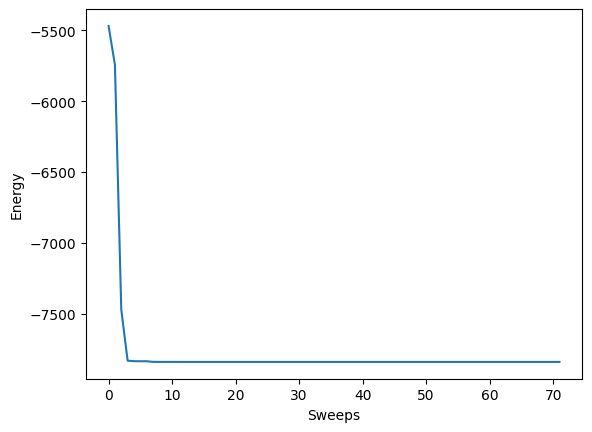

Solution energy = -7841.091270001542 + 5723.028749999999 (offset) = -2118.062520001544
(bit flip missing) {'1101111': 0.443, '1111111': 0.542, '1001111': 0.006, '1011111': 0.009}

 Neal solution:
 - Evaluating candidate  0000100
Energy: -5786.383749999999
+ offset (5723.028749999999) = -63.35500000000047


In [11]:
from dmrg_solver import DMRG_solver

chi = 32
qkp_DMRG = DMRG_solver(W_capacity, weights, values, chi)

s = 1 # time of annealing we want to simulate
qkp_DMRG.build_MPO_time_s(s)

numsweeps = 6 # number of DMRG sweeps
qkp_DMRG.run(numsweeps)

# qkp_DMRG.show_results()

def convert_to_string(lst, N):
    result = ['0'] * (N)
    for i in lst:
        result[i] = '1'
    return ''.join(result)

print('\n Neal solution:')
qkp_DMRG.energy_of_items(convert_to_string(solution_items, qkp_DMRG.N))
